# Homework 3 Part 2 - Solutions

---

# Import libraries and magics

In [1]:
# load libraries and magics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from time import time

---

# Exercise 1 (16 points)

**In this problem you will work with the [Immunotherapy dataset](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset).**

**This dataset contains information about wart treatment results of 90 patients using immunotherapy. There are 7 features (sex, age, time, number of warts, type, area and induration diameter). The target label is the column "Result_of_Treatment", where 0 means not successful and 1 means the treatment was successful.**

In [2]:
import pandas as pd

df = pd.read_csv('Immunotherapy.csv')
df

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


**Answer the following questions:**

1. (2 points) **Partition the data into training and test using a stratified 80/20 partition. For reproducible, fix the value for the ```random_state``` parameter.**

In [3]:
df_train, df_test = train_test_split(df, 
                                     test_size=0.2, 
                                     stratify=df['Result_of_Treatment'],
                                    random_state=0)

In [4]:
t_train=df_train['Result_of_Treatment'].copy()
X_train=df_train.drop(['Result_of_Treatment'], axis=1)

t_test=df_test['Result_of_Treatment'].copy()
X_test=df_test.drop(['Result_of_Treatment'], axis=1)

2. (14 points) **Train a soft-magin SVM with an RBF kernel with (MinMaxScaler) and without scaling the data. Carry our the necessary hyperparamater tuning on hyperparameter $C$ for each model. Which model performs best? Comment on the selected value for $C$ for a model with and without scaling.**

Starting with the unscaled model.

In [5]:
# Define unscaled pipeline
model_unscaled = Pipeline([('svc', SVC(kernel='rbf'))])

# Hyperparameter tuning
param_grid_unscaled={'svc__C': np.linspace(0.001,1000,100)}
GD_unscaled = GridSearchCV(model_unscaled, param_grid_unscaled,
                          cv=KFold(10, shuffle=True, random_state=0),
                          scoring='f1_weighted', refit=True)
GD_unscaled.fit(X_train, t_train)
print(GD_unscaled.best_params_)

# Model with select hyperparameter value
final_model_unscaled = GD_unscaled.best_estimator_

# Model performance
print('F1-score Training = ', f1_score(t_train, final_model_unscaled.predict(X_train)))
print('F1-score Test = ', f1_score(t_test, final_model_unscaled.predict(X_test)))

{'svc__C': 212.122}
F1-score Training =  0.9193548387096774
F1-score Test =  0.875


And now the scaled model.

In [6]:
# Define scaled pipeline
model_scaled = Pipeline([('scaler', MinMaxScaler()),
                         ('svc', SVC(kernel='rbf'))])

# Hyperparameter tuning
param_grid_scaled={'svc__C': np.linspace(0.001,1000,100)}
GD_scaled = GridSearchCV(model_scaled, param_grid_scaled,
                          cv=KFold(10, shuffle=True, random_state=0),
                          scoring='f1_weighted', refit=True)
GD_scaled.fit(X_train, t_train)
print(GD_scaled.best_params_)

# Model with select hyperparameter value
final_model_scaled = GD_scaled.best_estimator_

# Model performance
print('F1-score Training = ', f1_score(t_train, final_model_scaled.predict(X_train)))
print('F1-score Test = ', f1_score(t_test, final_model_scaled.predict(X_test)))

{'svc__C': 20.203000000000003}
F1-score Training =  0.9655172413793104
F1-score Test =  0.8


---

# Exercise 2 (19 points)

**In this problem, you will continue working with the [Immunotherapy dataset](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset).**

**Build and evaluate multiple machine learning pipelines using the following classifiers:**

* (5 points) **Logistic Regression**
* (5 points) **Random Forests**
* (5 points) **Gradient Boosting**
* (4 points) **Support Vector Machines (SVM)**

**You may include additional feature transformations or representations to help these models achieve competitive performance. Perform appropriate hyperparameter tuning for each model.**

**The goal is to identify the best-performing classifier and report the highest test set performance achieved.**

In [7]:
#Logistic Regression 
log_model = Pipeline([('scaler', StandardScaler()),
                        ('log_reg', LogisticRegression(solver='liblinear'))])

In [8]:
param_grid_log = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l1', 'l2']
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid_search_log = GridSearchCV(log_model,
                            param_grid_log,
                            cv=kfold,
                            n_jobs=-1,
                            verbose=1,
                            scoring='accuracy',
                            return_train_score=True)


grid_search_log.fit(X_train, t_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10],
                         'log_reg__penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [9]:
print("Best parameters: {}".format(grid_search_log.best_params_))

Best parameters: {'log_reg__C': 0.1, 'log_reg__penalty': 'l2'}


In [10]:
log_reg_best = grid_search_log.best_estimator_
print('Accuracy Score Test = ', accuracy_score(t_test, log_reg_best.predict(X_test)))
print('F1-score Test = ', f1_score(t_test, log_reg_best.predict(X_test)))

Accuracy Score Test =  0.7777777777777778
F1-score Test =  0.875


In [23]:
#Random Forest
rf_model = Pipeline([('scaler', StandardScaler()),
                        ('rf', RandomForestClassifier())
])

In [24]:
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_model,
                           param_grid_rf,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy',
                           return_train_score=True)

# Fit the pipeline with GridSearchCV

grid_search_rf.fit(X_train, t_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [25]:
print("Best parameters: {}".format(grid_search_rf.best_params_))

Best parameters: {'rf__max_depth': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}


In [26]:
rf_best = grid_search_rf.best_estimator_
print('Accuracy Score Test = ', accuracy_score(t_test, rf_best.predict(X_test)))
print('F1-score Test = ', f1_score(t_test, rf_best.predict(X_test)))

Accuracy Score Test =  0.8333333333333334
F1-score Test =  0.9032258064516129


In [15]:
#Gradient Boosting Classifier
gb_model = Pipeline([('scaler', StandardScaler()),
                     ('gb', GradientBoostingClassifier(random_state=0))])



In [16]:
param_grid_gb = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [1, 3, 5]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search_gb = GridSearchCV(gb_model,
                             param_grid_gb,
                             cv=kfold,
                             n_jobs=-1,
                             verbose=1,
                             scoring='accuracy',
                             return_train_score=True)

# Fit GridSearch on training data
grid_search_gb.fit(X_train, t_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gb',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': [0.01, 0.1, 0.2],
                         'gb__max_depth': [1, 3, 5],
                         'gb__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [17]:
print("Best parameters: {}".format(grid_search_gb.best_params_))

Best parameters: {'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 300}


In [18]:
gb_best = grid_search_gb.best_estimator_
print('Accuracy Score Test = ', accuracy_score(t_test, gb_best.predict(X_test)))
print('F1-score Test = ', f1_score(t_test, gb_best.predict(X_test)))

Accuracy Score Test =  0.8888888888888888
F1-score Test =  0.9285714285714286


In [19]:
#SVC Classifier

svc_model = Pipeline([('scaler', StandardScaler()),
                      ('svc', SVC())])


In [20]:
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(svc_model,
                             param_grid_svc,
                             cv=5,
                             n_jobs=-1,
                             verbose=1,
                             scoring='accuracy',
                            return_train_score=True)

grid_search_svc.fit(X_train, t_train)




Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [21]:
print("Best parameters: {}".format(grid_search_svc.best_params_))

Best parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [22]:
svc_best = grid_search_svc.best_estimator_
print('Accuracy Score Test = ', accuracy_score(t_test, svc_best.predict(X_test)))
print('F1-score Test = ', f1_score(t_test, svc_best.predict(X_test)))

Accuracy Score Test =  0.7777777777777778
F1-score Test =  0.875


# Exercise 3 (10 points)

**Let $x_i = (X_{i1}, X_{i2}, \dots, X_{id})$ be points drawn uniformly at random from the 
$d$-dimensional unit hypercube $[0,1]^d$.**

1. (4 points) **For each dimension $d \in \{2, 5, 10, 50, 100, 500\}$:**
    * **Generate $N = 1000$ random points $x_1, x_2, \dots, x_N \in [0,1]^d$.**
    * **Compute the pairwise Euclidean distances between all samples:**
      $$D_{ij} = \|x_i - x_j\|_2 = \sqrt{\sum_{k=1}^{d} (X_{ik} - X_{jk})^2}, \quad i,j = 1, \dots, N$$
    *  **For each point $x_i$, determine:**
      $$d_{\min}(x_i) = \min_{j \neq i} D_{ij}, \quad d_{\max}(x_i) = \max_{j \neq i} D_{ij}.$$
    * **Compute the average ratio:**
      $$R_d = \frac{\mathbb{E}[d_{\max}(x_i)]}{\mathbb{E}[d_{\min}(x_i)]}$$
    * **Plot $R_d$ as a function of $d$.**

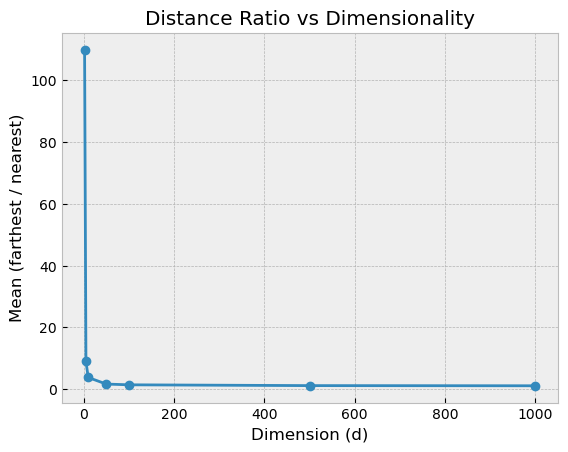

In [10]:
import numpy as np
import matplotlib.pyplot as plt

dims = [2, 5, 10, 50, 100, 500, 1000]
ratios = []

for d in dims:
    X = np.random.rand(1000, d)
    D = np.sqrt(((X[:, None, :] - X[None, :, :])**2).sum(axis=2))
    np.fill_diagonal(D, np.nan)
    nearest = np.nanmin(D, axis=1)
    farthest = np.nanmax(D, axis=1)
    ratios.append(np.mean(farthest / nearest))

plt.plot(dims, ratios, marker='o')
plt.xlabel('Dimension (d)')
plt.ylabel('Mean (farthest / nearest)')
plt.title('Distance Ratio vs Dimensionality')
plt.show();

In [11]:
ratios

[109.90790164786289,
 9.038697153948112,
 3.814622285926189,
 1.6777736089634265,
 1.4349797979806804,
 1.173864469409039,
 1.1200217055878638]

2. (3 points) **What do you observe as $d$ increases?**

As expected, the ratio $R_d = \frac{\mathbb{E}[d_{\max}(x_i)]}{\mathbb{E}[d_{\min}(x_i)]} \rightarrow 1$ as $d$ increases.

3. (3 points) **Explain why this illustrates the _curse of dimensionality_.**

In high-dimensional spaces, the nearest neighbor becomes almost as far away as the farthest point. All distances become approximately equal.

With constant sample size $N$, as $d$ grows, your training points spread apart exponentially. They become isolated in vast empty space. Yet paradoxically, they're all roughly the same distance apart, so you cannot tell which points are actually "close" or "relevant" to each other. Your data provides no guidance about local structure.

The *curse* is the very geometric properties we depend on for learning, such as clustering, proximity, neighborhoods, local patterns, they all disappear. Distance-based methods they all assume distance is meaningful. It's a curse because our intuitions and methods from low dimensions do not just weaken, they fundamentally break.

___